# importing the libraries


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist

# Define the dataset:

In [7]:
X = np.array([[5, 7], [8, 4], [3, 3], [4, 4], [3, 7], [6, 7], [6, 1], [5, 5]])


# calculate the distance matric 

In [8]:
dist_matrix = cdist(X, X, metric='euclidean')

In [9]:
dist_matrix

array([[0.        , 4.24264069, 4.47213595, 3.16227766, 2.        ,
        1.        , 6.08276253, 2.        ],
       [4.24264069, 0.        , 5.09901951, 4.        , 5.83095189,
        3.60555128, 3.60555128, 3.16227766],
       [4.47213595, 5.09901951, 0.        , 1.41421356, 4.        ,
        5.        , 3.60555128, 2.82842712],
       [3.16227766, 4.        , 1.41421356, 0.        , 3.16227766,
        3.60555128, 3.60555128, 1.41421356],
       [2.        , 5.83095189, 4.        , 3.16227766, 0.        ,
        3.        , 6.70820393, 2.82842712],
       [1.        , 3.60555128, 5.        , 3.60555128, 3.        ,
        0.        , 6.        , 2.23606798],
       [6.08276253, 3.60555128, 3.60555128, 3.60555128, 6.70820393,
        6.        , 0.        , 4.12310563],
       [2.        , 3.16227766, 2.82842712, 1.41421356, 2.82842712,
        2.23606798, 4.12310563, 0.        ]])

# Apply DBSCAN clustering:

In [3]:
eps = 3.5
min_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
labels = dbscan.fit_predict(X)


# Separate core, border, and noise points:

In [11]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

core_points = X[core_samples_mask]
border_points = X[np.logical_and(~core_samples_mask, labels != -1)]
noise_points = X[labels == -1]

# Print the core points for each data point:

In [12]:
print("Core Points:")
print("Data Point\tCore Points")
for i, x in enumerate(X):
    core_labels = [j for j, core in enumerate(core_points) if np.array_equal(core, x)]
    core_labels_str = ', '.join([f'S{j+1}' for j in core_labels])
    print(f'S{i+1}\t\t{core_labels_str}')
print()


Core Points:
Data Point	Core Points
S1		S1
S2		
S3		S2
S4		S3
S5		S4
S6		S5
S7		
S8		S6



# Plot the clusters:

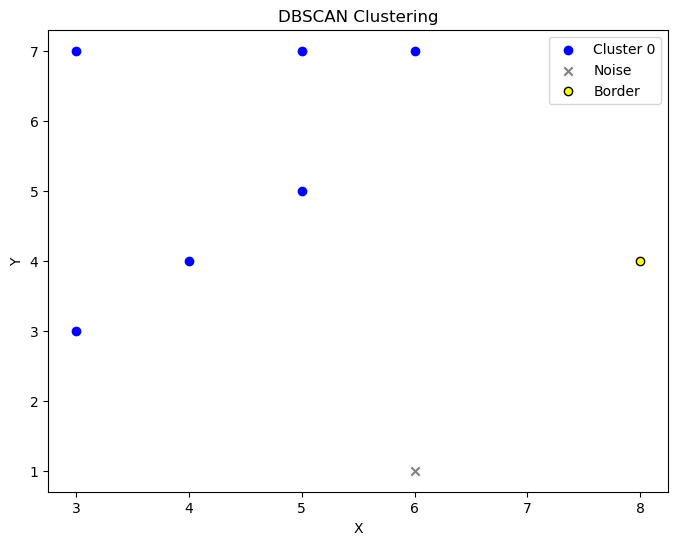

In [13]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple']
markers = ['o', 's', '^']
for label in set(labels):
    if label == -1:
        plt.scatter(noise_points[:, 0], noise_points[:, 1], color='gray', marker='x', label='Noise')
    elif label == 0:
        plt.scatter(core_points[:, 0], core_points[:, 1], color=colors[label], marker=markers[0],
                    label=f'Cluster {label}')
    else:
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[label % len(colors)],
                    marker=markers[label % len(markers)], label=f'Cluster {label}')

if len(border_points) > 0:
    plt.scatter(border_points[:, 0], border_points[:, 1], color='yellow', marker='o', edgecolors='black',
                linewidths=1, label='Border')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
